In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
diabetes = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv", sep = ',')

diabetes 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data Manipulation

In [ ]:
diabetes.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.head(15) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Pregnancy is not a common attribute, so we drop it.

In [ ]:
# Outcome(Y) = 0:Not Diabetic , 1:Diabetic 
diabetes_raw = diabetes.drop(['Pregnancies', 'Outcome'], axis = 1)

In [ ]:
diabetes_raw.replace(0, np.nan, inplace = True)

In [ ]:
diabetes_raw.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Handling Missing values

In [ ]:
diabetes_raw['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [ ]:
np.round(diabetes_raw['Insulin'].mean())

156.0

In [ ]:
#Mean Imputation without library
diabetes_raw['Insulin'].replace(np.nan, np.round(diabetes_raw['Insulin'].mean()), inplace = True)

Imputer

In [ ]:
from sklearn.impute import SimpleImputer
# strategy = 'mean', 'median'
impute = SimpleImputer(strategy = 'median')
diabetes_array = impute.fit_transform(diabetes_raw)

In [ ]:
diabetes_array 

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df = pd.DataFrame(diabetes_array, columns = diabetes_raw.columns)

In [ ]:
diabetes_df['Pregnancies'] = diabetes.Pregnancies
diabetes_df['Outcome'] = diabetes.Outcome 

Data Augumentation
* Regenerating new samples using bootstraping for biased dataset.

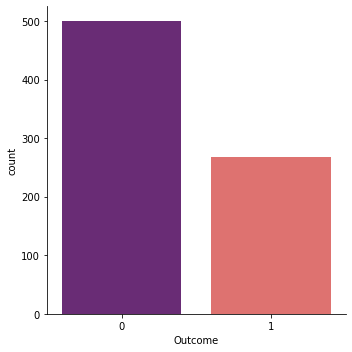

In [ ]:
sns.catplot(x = "Outcome", kind = "count", data = diabetes_df, palette='magma')

In [ ]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Resample uses bootstrapping method to regenerate samples by randomly selecting data for each class.
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

In [ ]:
df_0

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
5,116.0,74.0,29.0,156.0,25.6,0.201,30.0,5,0
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10,0
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4,0
...,...,...,...,...,...,...,...,...,...
762,89.0,62.0,29.0,156.0,22.5,0.142,33.0,9,0
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0


In [ ]:
df_1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
6,78.0,50.0,32.0,88.0,31.0,0.248,26.0,3,1
8,197.0,70.0,45.0,543.0,30.5,0.158,53.0,2,1
...,...,...,...,...,...,...,...,...,...
755,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1,1
757,123.0,72.0,29.0,156.0,36.3,0.258,52.0,0,1
759,190.0,92.0,29.0,156.0,35.5,0.278,66.0,6,1
761,170.0,74.0,31.0,156.0,44.0,0.403,43.0,9,1


In [ ]:
# Apply resample
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state= 123)
df_1_upsample

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
259,155.0,76.0,28.0,150.0,33.3,1.353,51.0,11,1
667,111.0,70.0,27.0,156.0,27.5,0.141,40.0,10,1
26,147.0,76.0,29.0,156.0,39.4,0.257,43.0,7,1
219,112.0,66.0,29.0,156.0,37.8,0.261,41.0,5,1
283,161.0,86.0,29.0,156.0,30.4,0.165,47.0,7,1
...,...,...,...,...,...,...,...,...,...
429,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1,1
701,125.0,78.0,31.0,156.0,27.6,0.565,49.0,6,1
476,105.0,80.0,45.0,191.0,33.7,0.711,29.0,2,1
579,197.0,70.0,99.0,156.0,34.7,0.575,62.0,2,1


In [ ]:
diabetes_df1 = pd.concat([df_0, df_1_upsample])
diabetes_df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
5,116.0,74.0,29.0,156.0,25.6,0.201,30.0,5,0
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10,0
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4,0
...,...,...,...,...,...,...,...,...,...
429,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1,1
701,125.0,78.0,31.0,156.0,27.6,0.565,49.0,6,1
476,105.0,80.0,45.0,191.0,33.7,0.711,29.0,2,1
579,197.0,70.0,99.0,156.0,34.7,0.575,62.0,2,1


In [ ]:
diabetes_df1['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

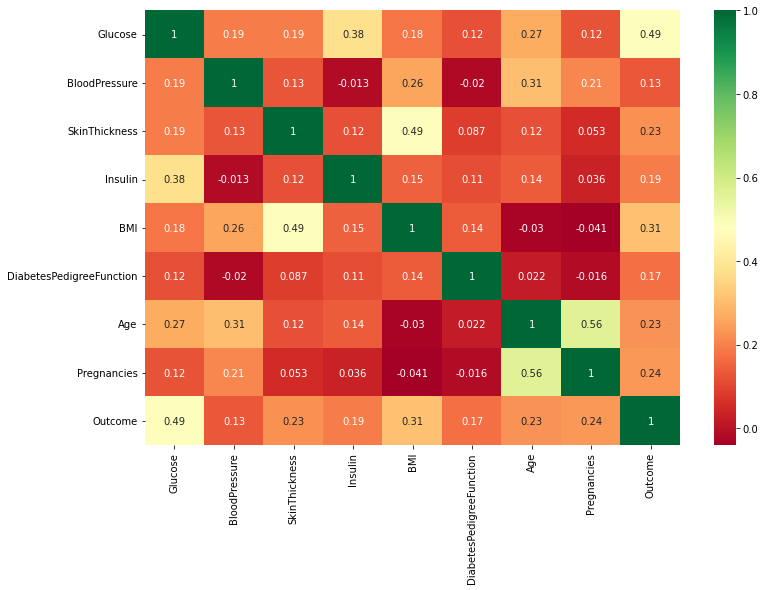

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(diabetes_df1.corr(), annot = True, cmap = 'RdYlGn')

**All the attributes are having significant correlation with the target attribute and number of attributes is also fine. So no need to drop any**

In [ ]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y = diabetes_df1['Outcome']

**Parameters of MLP in SKLearn**
* hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.
* max_iter: It denotes the number of epochs.
* activation: The activation function for the hidden layers.
* solver: This parameter specifies the algorithm for weight optimization across the nodes.
* random_state: The parameter allows to set a seed for reproducing the same results


In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
#classifier = MLPClassifier(hidden_layer_sizes=(100,100,50), alpha=0.1,max_iter=500,activation = 'relu',solver='adam',random_state=1)
#classifier = MLPClassifier(hidden_layer_sizes=(100,50,50), alpha=0.1,max_iter=500,activation = 'relu',solver='adam',random_state=1)
#classifier = MLPClassifier(hidden_layer_sizes=(100,60,60), alpha=0.1,max_iter=500,activation = 'relu',solver='adam',random_state=1)
classifier = MLPClassifier(hidden_layer_sizes=(25,25,25), alpha=0.01,max_iter=200,activation = 'relu',solver='adam',random_state=1)
#classifier = MLPClassifier(hidden_layer_sizes=(30,25,25), alpha=0.01,max_iter=500,activation = 'relu',solver='adam',random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
#Fitting the training data to the network
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.01, hidden_layer_sizes=(25, 25, 25), random_state=1)

In [ ]:
#Predicting y for X_val
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0])

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y_test)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.69


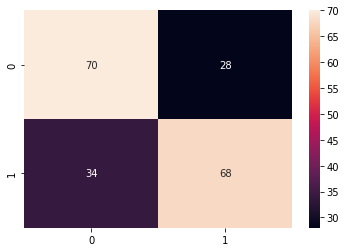

In [ ]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        98
           1       0.71      0.67      0.69       102

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

